# Descriptive Statistics

> [Laboratory of Biomechanics and Motor Control](http://demotu.org/)  
> Federal University of ABC, Brazil

In [1]:
import sys, os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
import pingouin as pg

sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.1)
palette = sns.color_palette(palette='Set1')  # tab10
palette[0], palette[1] = palette[1], palette[0]
sns.set_palette(palette=palette)
pd.set_option('precision', 3)  # number of decimal places for the environment

In [2]:
# load data
path2 = r'./../data/'
fname = os.path.join(path2, 'UD_stats_all_speeds_2.csv')
df = pd.read_csv(fname, sep=',', header=0, index_col=0)
df

,Subject,AgeGroup,SpeedGroup,Gender,Age,Height,Mass,BMI,LegLen,Speed,StanceTime,Pankle,Pfoot,Psum,Wpankle,Wpfoot,Wpsum,Wnankle,Wnfoot,Wnsum
0,1,Y,S,M,25,1.725,74.30,24.970,0.890,0.86,0.822,1.687,0.349,1.343,0.177,0.014,0.151,-0.137,-0.026,-0.155
41,1,Y,C,M,25,1.725,74.30,24.970,0.890,1.21,0.650,2.536,0.858,1.732,0.217,0.027,0.147,-0.130,-0.052,-0.182
82,1,Y,F,M,25,1.725,74.30,24.970,0.890,1.59,0.559,2.835,1.120,1.838,0.328,0.026,0.227,-0.090,-0.076,-0.136
1,2,Y,S,F,22,1.668,52.90,19.014,0.865,0.98,0.794,1.391,0.244,1.159,0.169,0.004,0.121,-0.168,-0.023,-0.188
42,2,Y,C,F,22,1.668,52.90,19.014,0.865,1.24,0.639,2.701,0.635,2.067,0.247,0.004,0.167,-0.123,-0.044,-0.168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,41,O,C,F,55,1.495,74.05,33.132,0.750,1.25,0.590,2.189,0.661,1.635,0.192,0.008,0.107,-0.143,-0.071,-0.207
121,41,O,F,F,55,1.495,74.05,33.132,0.750,1.41,0.553,2.302,0.457,2.011,0.226,0.011,0.152,-0.107,-0.076,-0.171
40,42,O,S,F,63,1.612,59.85,23.032,0.820,0.64,1.004,0.932,0.257,0.780,0.200,0.012,0.135,-0.133,-0.005,-0.138
81,42,O,C,F,63,1.612,59.85,23.032,0.820,0.89,0.739,1.756,0.464,1.338,0.218,0.016,0.176,-0.167,-0.022,-0.179


## Helper functions

In [3]:
def ttest(df, var, factor, levels=None, alpha=0.05):
    """t-test statistcs for dataframe columns using the pingouin library.
    """
    stats = pd.DataFrame()
    if levels is None:
        levels = df[factor].unique()
    if len(levels) != 2:
        raise Exception('Incorrect number of levels: {}'.format(len(levels)))
    for v in var:
        x = df[df[factor] == levels[0]][v]
        y = df[df[factor] == levels[1]][v]
        stat = pg.ttest(x, y)
        stat.index = [v]
        stats = pd.concat([stats, stat], axis=0)
    stats.drop(columns=['tail', 'BF10', 'power'], inplace=True)
    stats.index.name = '{}-{}'.format(*levels)
    display(stats.style.format({'p-val': '{:.3f}'}).apply(sig_red, subset='p-val', axis=1))
    return stats

def normality(df):
    """Get the p-val of the normality test using the pingouin library.
    """
    return pg.normality(df)['pval']

def sig_red(col, alpha=0.05):
    """Returns string 'color: red' for `col` < `alpha`, black otherwise.
    """
    is_sig = col < alpha
    return ['color: red' if x else 'color: black' for x in is_sig]

def describe(df, by, var=['count', 'mean', 'std', 'min', 'max', normality]):
    """Descriptive statistics for dataframe columns.
    """
    x = df.groupby(by).agg(var).stack().transpose()
    display(x.style.apply(sig_red,
                          subset=[col for col in x.columns if col[1] == 'normality']))    
    return x

# Descriptive statistics

In [4]:
var = ['AgeGroup', 'Age', 'Height', 'Mass', 'BMI', 'LegLen']
info = df.drop_duplicates(subset='Subject')[var]
describe(info, 'AgeGroup');
stats = ttest(info, var[1:], 'AgeGroup', levels=['O', 'Y'])

,T,dof,p-val,CI95%,cohen-d
O-Y,,,,,
Age,16.521,23.209,0.000,[30.21 38.86],5.736
Height,-3.022,36.278,0.005,[-0.16 -0.03],0.944
Mass,-0.645,38.279,0.523,[-9.22 4.76],0.197
BMI,1.669,36.489,0.104,[-0.43 4.44],0.520
LegLen,-1.904,30.277,0.066,[-0.09 0. ],0.624


In [5]:
df

,Subject,AgeGroup,SpeedGroup,Gender,Age,Height,Mass,BMI,LegLen,Speed,StanceTime,Pankle,Pfoot,Psum,Wpankle,Wpfoot,Wpsum,Wnankle,Wnfoot,Wnsum
0,1,Y,S,M,25,1.725,74.30,24.970,0.890,0.86,0.822,1.687,0.349,1.343,0.177,0.014,0.151,-0.137,-0.026,-0.155
41,1,Y,C,M,25,1.725,74.30,24.970,0.890,1.21,0.650,2.536,0.858,1.732,0.217,0.027,0.147,-0.130,-0.052,-0.182
82,1,Y,F,M,25,1.725,74.30,24.970,0.890,1.59,0.559,2.835,1.120,1.838,0.328,0.026,0.227,-0.090,-0.076,-0.136
1,2,Y,S,F,22,1.668,52.90,19.014,0.865,0.98,0.794,1.391,0.244,1.159,0.169,0.004,0.121,-0.168,-0.023,-0.188
42,2,Y,C,F,22,1.668,52.90,19.014,0.865,1.24,0.639,2.701,0.635,2.067,0.247,0.004,0.167,-0.123,-0.044,-0.168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,41,O,C,F,55,1.495,74.05,33.132,0.750,1.25,0.590,2.189,0.661,1.635,0.192,0.008,0.107,-0.143,-0.071,-0.207
121,41,O,F,F,55,1.495,74.05,33.132,0.750,1.41,0.553,2.302,0.457,2.011,0.226,0.011,0.152,-0.107,-0.076,-0.171
40,42,O,S,F,63,1.612,59.85,23.032,0.820,0.64,1.004,0.932,0.257,0.780,0.200,0.012,0.135,-0.133,-0.005,-0.138
81,42,O,C,F,63,1.612,59.85,23.032,0.820,0.89,0.739,1.756,0.464,1.338,0.218,0.016,0.176,-0.167,-0.022,-0.179


In [7]:
var = ['SpeedGroup', 'AgeGroup', 'Speed', 'StanceTime']
print('Slow speed')
info = df[df['SpeedGroup']=='S'].drop_duplicates(subset='Subject')[var]
stats = ttest(info, var[2:], 'AgeGroup', levels=['O', 'Y'])
print('Comfortable speed')
info = df[df['SpeedGroup']=='C'].drop_duplicates(subset='Subject')[var].copy()
stats = ttest(info, var[2:], 'AgeGroup', levels=['O', 'Y'])
print('Fast speed')
info = df[df['SpeedGroup']=='F'].drop_duplicates(subset='Subject')[var].copy()
stats = ttest(info, var[2:], 'AgeGroup', levels=['O', 'Y'])

Slow speed


,T,dof,p-val,CI95%,cohen-d
O-Y,,,,,
Speed,0.309,32.730,0.759,[-0.07 0.1 ],0.100
StanceTime,-0.753,30.661,0.457,[-0.08 0.03],0.246


Comfortable speed


,T,dof,p-val,CI95%,cohen-d
O-Y,,,,,
Speed,-0.112,31.026,0.912,[-0.13 0.12],0.036
StanceTime,-1.191,29.886,0.243,[-0.06 0.02],0.392


Fast speed


,T,dof,p-val,CI95%,cohen-d
O-Y,,,,,
Speed,-0.779,26.346,0.443,[-0.19 0.09],0.263
StanceTime,-0.339,33.733,0.737,[-0.04 0.03],0.108


## Peak powers

In [8]:
data = df[df['AgeGroup']=='Y'][['Speed', 'SpeedGroup', 'Pankle', 'Pfoot', 'Psum']]
describe(data, 'SpeedGroup');
data = df[df['AgeGroup']=='O'][['Speed', 'SpeedGroup', 'Pankle', 'Pfoot', 'Psum']]
describe(data, 'SpeedGroup');

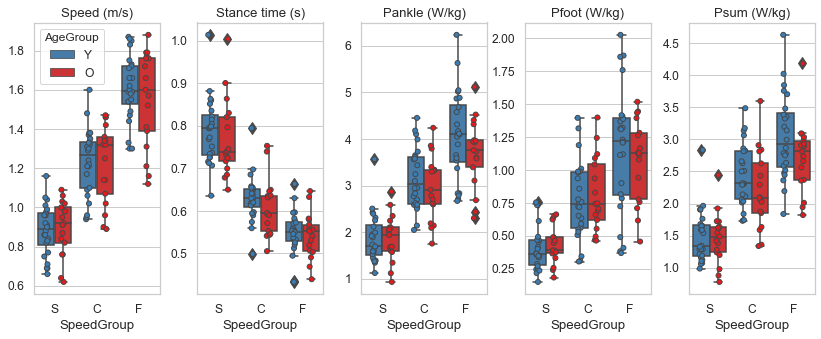

In [10]:
var = ['Speed', 'StanceTime', 'Pankle', 'Pfoot', 'Psum']
labels = ['Speed (m/s)', 'Stance time (s)', 'Pankle (W/kg)', 'Pfoot (W/kg)', 'Psum (W/kg)']
fig, axs = plt.subplots(1, 5, figsize=(14, 5), gridspec_kw={'hspace': .1, 'wspace': .3})
for ax, v, label in zip(axs, var, labels):
    sns.stripplot(x='SpeedGroup', y=v, data=df, ax=ax, hue='AgeGroup', jitter=True,
                  edgecolor='gray', linewidth=1, dodge=True)
    sns.boxplot(x='SpeedGroup', y=v, data=df, fliersize=9, ax=ax, hue='AgeGroup')
    handles, labels = ax.get_legend_handles_labels()
    if v == 'Speed':
        ax.legend(handles[:2], labels[:2], frameon=True, loc='best', title='AgeGroup')
    else:
        ax.get_legend().remove()
    ax.set_title(label)
    #ax.set_xlabel('Category')
    ax.set_ylabel('')
plt.show()

## Positive work

In [11]:
data = df[df['AgeGroup']=='Y'][['Speed', 'SpeedGroup', 'Wpankle', 'Wpfoot', 'Wpsum']]
describe(data, 'SpeedGroup');
data = df[df['AgeGroup']=='O'][['Speed', 'SpeedGroup', 'Wpankle', 'Wpfoot', 'Wpsum']]
describe(data, 'SpeedGroup');

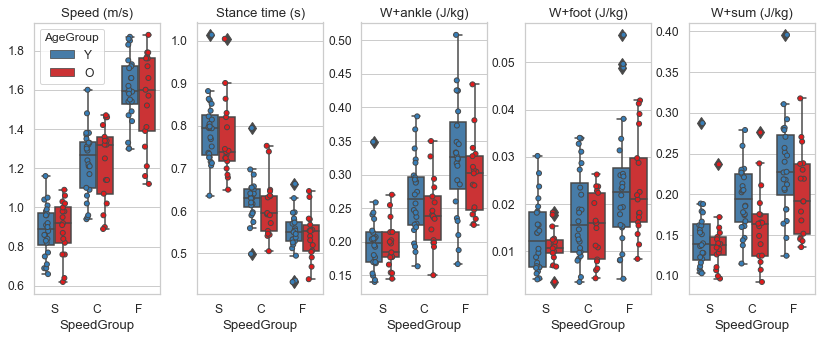

In [12]:
var = ['Speed', 'StanceTime', 'Wpankle', 'Wpfoot', 'Wpsum']
labels = ['Speed (m/s)', 'Stance time (s)', 'W+ankle (J/kg)',  'W+foot (J/kg)', 'W+sum (J/kg)']
fig, axs = plt.subplots(1, 5, figsize=(14, 5), gridspec_kw={'hspace': .1, 'wspace': .3})
for ax, v, label in zip(axs, var, labels):
    sns.stripplot(x='SpeedGroup', y=v, data=df, ax=ax, hue='AgeGroup', jitter=True,
                  edgecolor='gray', linewidth=1, dodge=True)
    sns.boxplot(x='SpeedGroup', y=v, data=df, fliersize=9, ax=ax, hue='AgeGroup')
    handles, labels = ax.get_legend_handles_labels()
    if v == 'Speed':
        ax.legend(handles[:2], labels[:2], frameon=True, loc='best', title='AgeGroup')
    else:
        ax.get_legend().remove()
    ax.set_title(label)
    #ax.set_xlabel('Category')
    ax.set_ylabel('')
plt.show()

## Negative work

In [13]:
data = df[df['AgeGroup']=='Y'][['Speed', 'SpeedGroup', 'Wnankle', 'Wnfoot', 'Wnsum']]
describe(data, 'SpeedGroup');
data = df[df['AgeGroup']=='O'][['Speed', 'SpeedGroup', 'Wnankle', 'Wnfoot', 'Wnsum']]
describe(data, 'SpeedGroup');

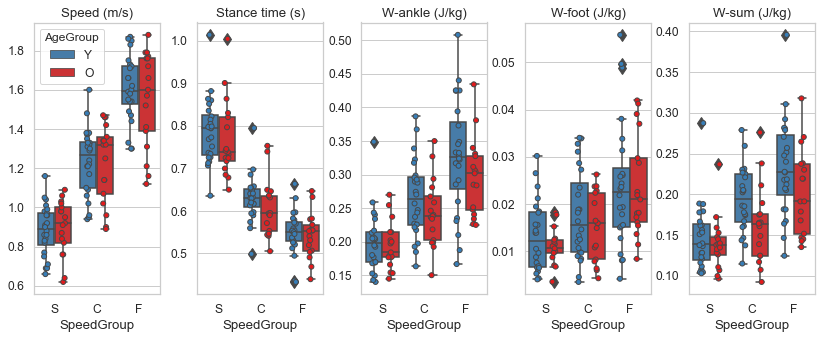

In [14]:
var = ['Speed', 'StanceTime', 'Wpankle', 'Wpfoot', 'Wpsum']
labels = ['Speed (m/s)', 'Stance time (s)', 'W-ankle (J/kg)',  'W-foot (J/kg)', 'W-sum (J/kg)']
fig, axs = plt.subplots(1, 5, figsize=(14, 5), gridspec_kw={'hspace': .1, 'wspace': .3})
for ax, v, label in zip(axs, var, labels):
    sns.stripplot(x='SpeedGroup', y=v, data=df, ax=ax, hue='AgeGroup', jitter=True,
                  edgecolor='gray', linewidth=1, dodge=True)
    sns.boxplot(x='SpeedGroup', y=v, data=df, fliersize=9, ax=ax, hue='AgeGroup')
    handles, labels = ax.get_legend_handles_labels()
    if v == 'Speed':
        ax.legend(handles[:2], labels[:2], frameon=True, loc='best', title='AgeGroup')
    else:
        ax.get_legend().remove()
    ax.set_title(label)
    #ax.set_xlabel('Category')
    ax.set_ylabel('')
plt.show()

## Distribution of variables

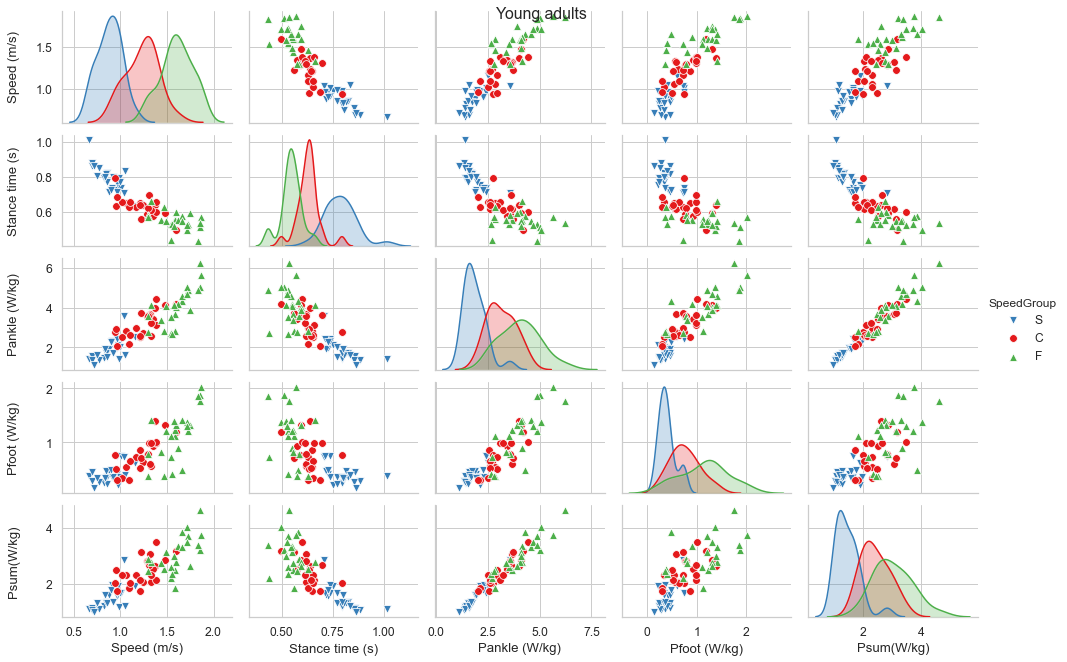

In [15]:
labels = ['Speed (m/s)', 'Stance time (s)', 'Pankle (W/kg)', 'Pfoot (W/kg)', 'Psum(W/kg)']
g = sns.pairplot(df[df['AgeGroup']=='Y'], vars=['Speed', 'StanceTime', 'Pankle', 'Pfoot', 'Psum'],
                 markers=['v', 'o', '^'], hue='SpeedGroup', plot_kws={'s':60}, height=1.8, aspect=1.5)
axs = g.axes.flatten()
for i in range(len(labels)):
    axs[int(i*len(labels))].set_ylabel(labels[i])
    axs[int(i*len(labels))].yaxis.set_label_coords(-0.25, .5)
    axs[int(i+(len(labels)-1)*len(labels))].set_xlabel(labels[i])
g.fig.suptitle('Young adults', y=1)
plt.show()

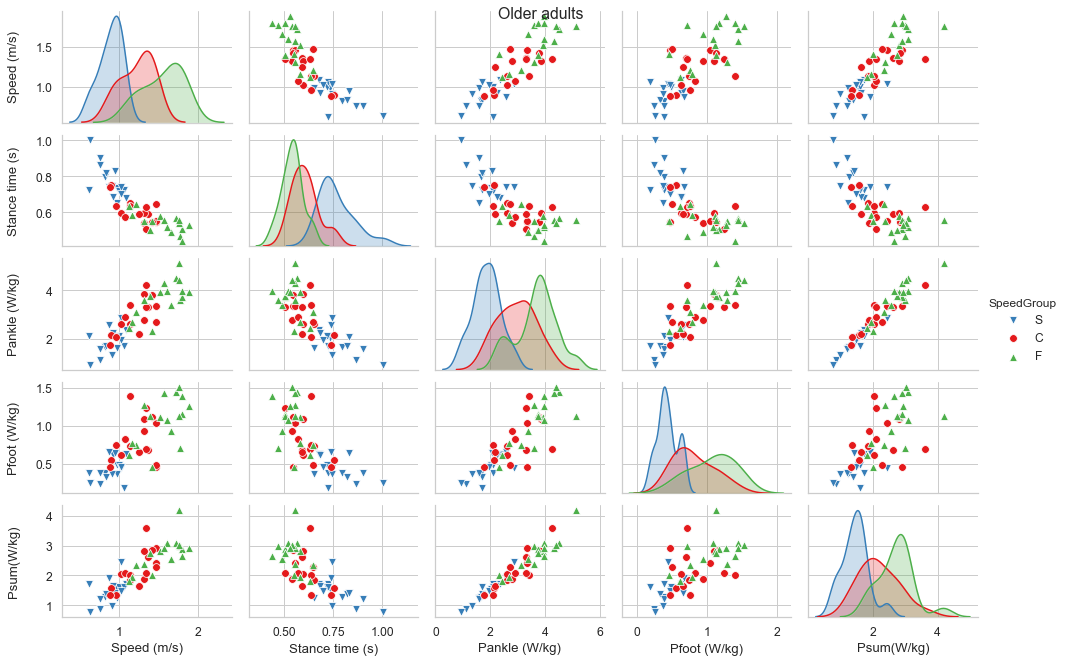

In [16]:
g = sns.pairplot(df[df['AgeGroup']=='O'], vars=['Speed', 'StanceTime', 'Pankle', 'Pfoot', 'Psum'],
                 markers=['v', 'o', '^'], hue='SpeedGroup', plot_kws={'s':60}, height=1.8, aspect=1.5)
axs = g.axes.flatten()
for i in range(len(labels)):
    axs[int(i*len(labels))].set_ylabel(labels[i])
    axs[int(i*len(labels))].yaxis.set_label_coords(-0.25, .5)
    axs[int(i+(len(labels)-1)*len(labels))].set_xlabel(labels[i])
    g.fig.suptitle('Older adults', y=1)
plt.show()

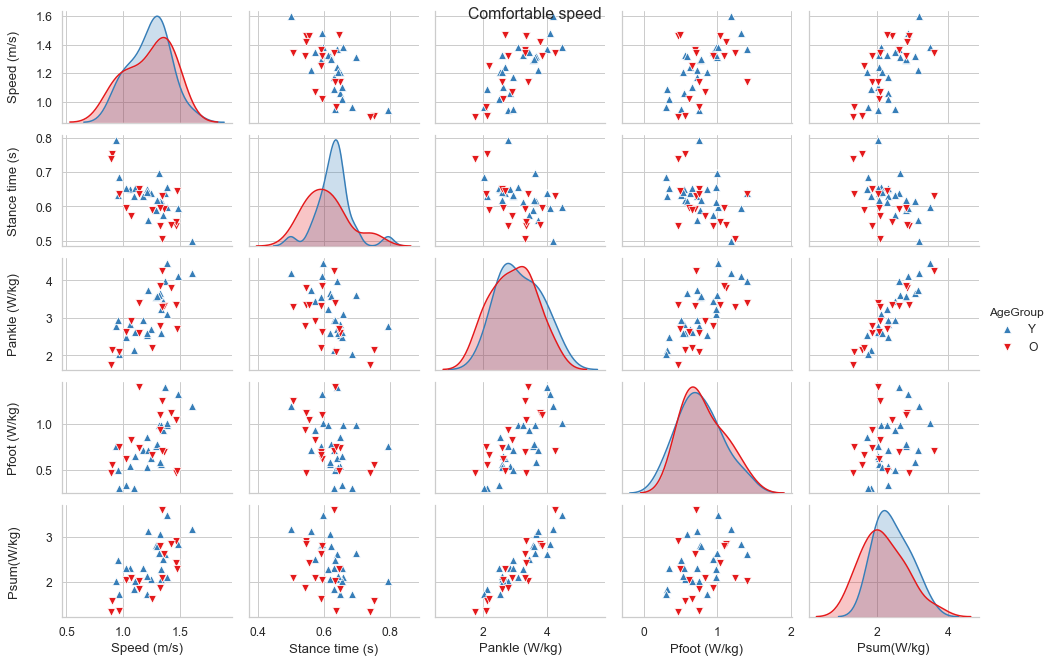

In [17]:
g = sns.pairplot(df[df['SpeedGroup']=='C'], vars=['Speed', 'StanceTime', 'Pankle', 'Pfoot', 'Psum'],
                 markers=['^', 'v'], hue='AgeGroup', plot_kws={'s':60}, height=1.8, aspect=1.5)
axs = g.axes.flatten()
for i in range(len(labels)):
    axs[int(i*len(labels))].set_ylabel(labels[i])
    axs[int(i*len(labels))].yaxis.set_label_coords(-0.25, .5)
    axs[int(i+(len(labels)-1)*len(labels))].set_xlabel(labels[i])
g.fig.suptitle('Comfortable speed', y=1)
plt.show()

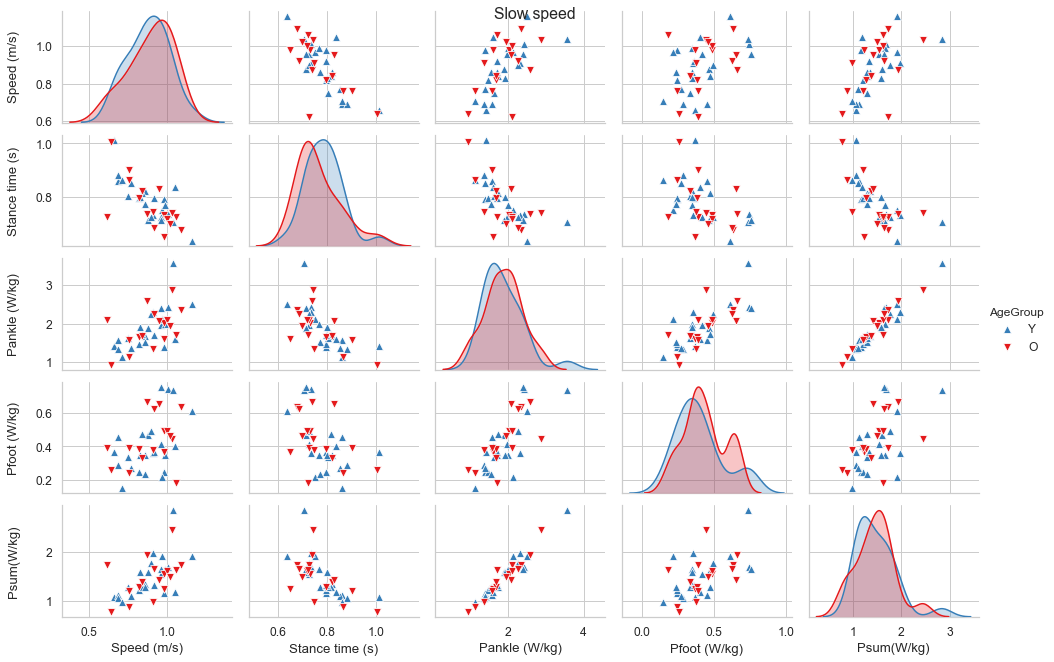

In [18]:
g = sns.pairplot(df[df['SpeedGroup']=='S'], vars=['Speed', 'StanceTime', 'Pankle', 'Pfoot', 'Psum'],
                 markers=['^', 'v'], hue='AgeGroup', plot_kws={'s':60}, height=1.8, aspect=1.5)
axs = g.axes.flatten()
for i in range(len(labels)):
    axs[int(i*len(labels))].set_ylabel(labels[i])
    axs[int(i*len(labels))].yaxis.set_label_coords(-0.25, .5)
    axs[int(i+(len(labels)-1)*len(labels))].set_xlabel(labels[i])
g.fig.suptitle('Slow speed', y=1)
plt.show()

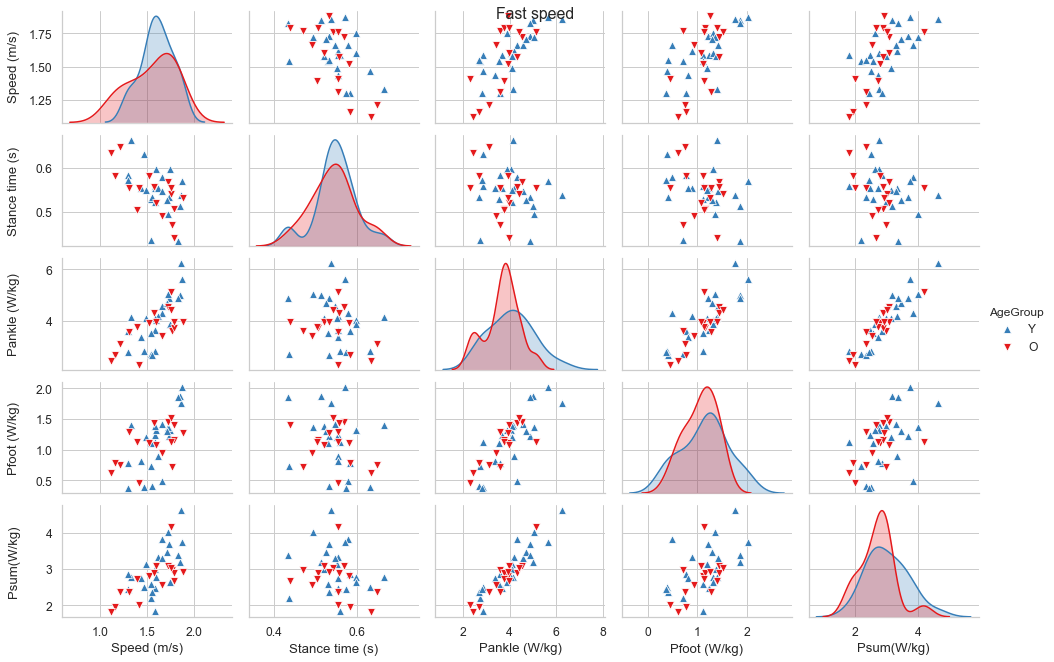

In [19]:
g = sns.pairplot(df[df['SpeedGroup']=='F'], vars=['Speed', 'StanceTime', 'Pankle', 'Pfoot', 'Psum'],
                 markers=['^', 'v'], hue='AgeGroup', plot_kws={'s':60}, height=1.8, aspect=1.5)
axs = g.axes.flatten()
for i in range(len(labels)):
    axs[int(i*len(labels))].set_ylabel(labels[i])
    axs[int(i*len(labels))].yaxis.set_label_coords(-0.25, .5)
    axs[int(i+(len(labels)-1)*len(labels))].set_xlabel(labels[i])
g.fig.suptitle('Fast speed', y=1)
plt.show()